# Model for Sample II: Mixed Bag

-----------

## Introduction: 
----

Here is my second sample of the mixed bag of images. The models, pipeline, and process are the same as first sample run earlier on wine.

The five items selected for the set are: 

- Photography Books 
- Auto Fuses
- Hinges
- Lotion 
- Bed Headboards

As discussed in the EDA, the two sets have the same number of items and similar distributions of items per categories. The biggest differences being, that all the items in this list come from different level_1 categories from the cDiscount labeling system, and there is more variability between items within a category.


In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

import tensorflow as tf

import time
import threading

import numpy as np

In [42]:
targets = [1000014042, 1000005888, 1000015754, 1000002844, 1000003988]
label_encoder = LabelEncoder()
label_encoder.fit(targets)

LabelEncoder()

In [43]:
with open('MB_Xtrain.npy', 'rb') as np_in:
    Xread= np.load(np_in)

In [44]:
Xread.shape

(6633, 180, 180, 3)

In [45]:
with open('mb_final_ytrain.npy', 'rb') as np_yin:
    Yread= np.load(np_yin)

In [46]:
Yread.shape

(6633,)

In [49]:
Yread_en = label_encoder.transform(Yread)

In [50]:
Yread_en

array([3, 0, 4, ..., 3, 3, 3])

In [51]:
Yread_en.shape

(6633,)

In [52]:
X = Xread
y= Yread_en

In [53]:
y_cat = to_categorical(y)

In [54]:
y_cat.shape

(6633, 5)

## Train Test Split 

------ 


In [56]:
# Update the train-test-split size 

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, random_state=2003)

X_train = X_train.reshape(X_train.shape[0], 180, 180, 3)
X_test = X_test.reshape(X_test.shape[0], 180, 180, 3)



## First Model

----

In [57]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16, (4,4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 4974 samples, validate on 1659 samples
Epoch 1/5
4974/4974 [==============================] - 348s 70ms/step - loss: 0.9013 - acc: 0.6832 - val_loss: 0.7620 - val_acc: 0.7595
Epoch 2/5
4974/4974 [==============================] - 334s 67ms/step - loss: 0.5841 - acc: 0.8106 - val_loss: 0.8770 - val_acc: 0.7203
Epoch 3/5
4974/4974 [==============================] - 330s 66ms/step - loss: 0.3804 - acc: 0.8725 - val_loss: 0.6131 - val_acc: 0.8409
Epoch 4/5
4974/4974 [==============================] - 332s 67ms/step - loss: 0.2103 - acc: 0.9292 - val_loss: 0.6568 - val_acc: 0.8475
Epoch 5/5
4974/4974 [==============================] - 317s 64ms/step - loss: 0.1187 - acc: 0.9602 - val_loss: 0.7120 - val_acc: 0.8264


In [58]:
keras.callbacks.History()

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 176, 176, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 85, 85, 16)        8208      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                903200    
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 165       
Total para

The following two graphs show the relationship between the accuracy of the model and the loss between the training and testing data. This is a good way to see if the model is over fitting and how well it is at reducing the loss.

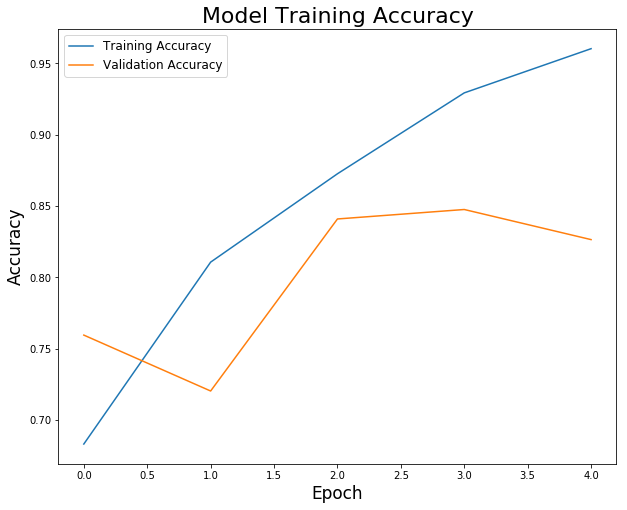

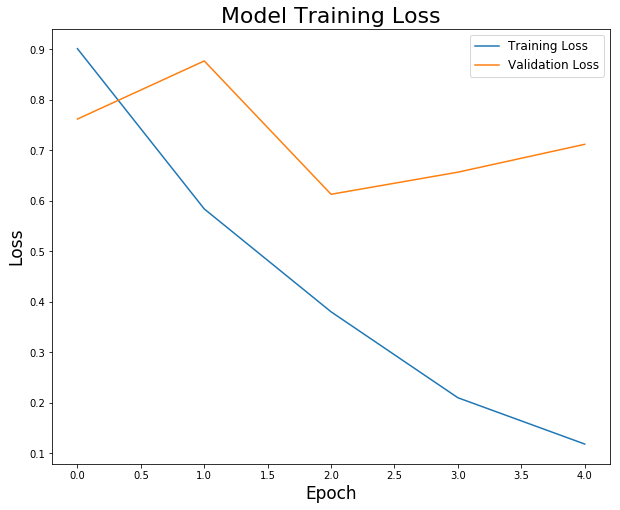

In [60]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

## Import Test Data 

In [61]:
# Import the Testing Data
with open('MB_Xtest.npy', 'rb') as np_in_test:
    Xt_in= np.load(np_in_test)


In [62]:
Xt_in.shape

(1283, 180, 180, 3)

In [63]:
with open('mb_final_ytest.npy', 'rb') as np_in_ytest_fixed:
    yt_fixed = np.load(np_in_ytest_fixed)

In [64]:
yt_fixed

array([1000005888, 1000002844, 1000005888, ..., 1000014042, 1000015754,
       1000002844])

In [65]:
yt_fixed.shape

(1283,)

In [66]:
yt_en = label_encoder.transform(yt_fixed)

In [67]:
yt_en

array([2, 0, 2, ..., 3, 4, 0])

In [68]:
yt_cats = to_categorical(yt_en)

In [69]:
yt_cats

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [70]:
yt_cats.shape

(1283, 5)

In [74]:
Xt = Xt_in


In [75]:
Xt.shape

(1283, 180, 180, 3)

In [78]:
model.fit(X, y_cat, validation_data=(Xt, yt_cats), epochs=5)

Train on 6633 samples, validate on 1283 samples
Epoch 1/5
6633/6633 [==============================] - 297s 45ms/step - loss: 0.2727 - acc: 0.9310 - val_loss: 0.5584 - val_acc: 0.8504
Epoch 2/5
6633/6633 [==============================] - 255s 38ms/step - loss: 0.1064 - acc: 0.9705 - val_loss: 0.6805 - val_acc: 0.8737
Epoch 3/5
6633/6633 [==============================] - 252s 38ms/step - loss: 0.0488 - acc: 0.9876 - val_loss: 0.7448 - val_acc: 0.8698
Epoch 4/5
6633/6633 [==============================] - 251s 38ms/step - loss: 0.0329 - acc: 0.9920 - val_loss: 0.8010 - val_acc: 0.8815
Epoch 5/5
6633/6633 [==============================] - 250s 38ms/step - loss: 0.0116 - acc: 0.9982 - val_loss: 0.9118 - val_acc: 0.8722


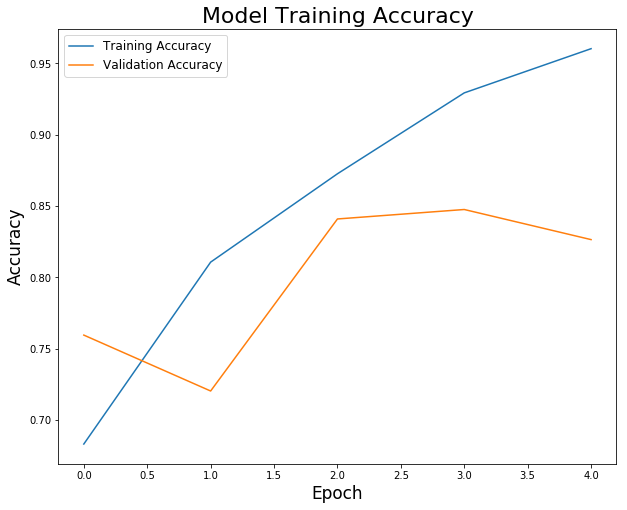

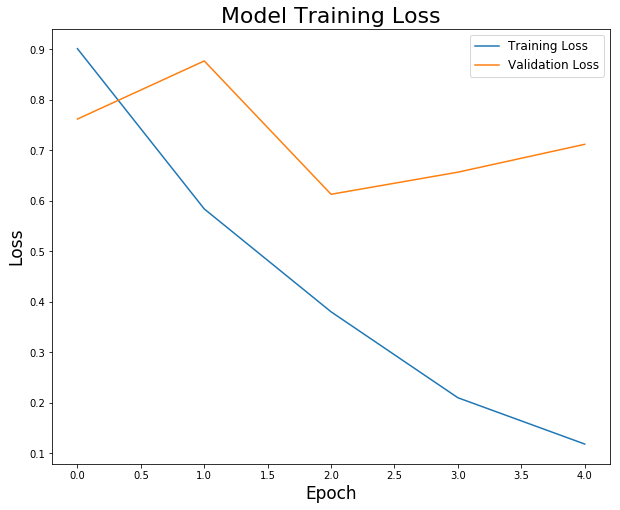

In [80]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_1.history['acc'])
plt.plot(model_1.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

## Full Data Predictions 

In [87]:
#Build predictions
model_1_preds = model.predict_classes(Xt, 32, verbose=1)

1283/1283 [==============================] - 24s 18ms/step


In [99]:
pd.DataFrame(confusion_matrix(yt_en, model_1_preds),
             columns=targets, index=["Photo Books (-4042)", "Auto Fuses (-5588)",
                                    "Headboards (-5754)", "Hinges (-2844)", 
                                    "Lotion (-3988)"]).apply(lambda x: x/x.sum(),axis=1)

,1000014042,1000005888,1000015754,1000002844,1000003988
Photo Books (-4042),0.795918,0.020408,0.102041,0.068027,0.013605
Auto Fuses (-5588),0.050000,0.550000,0.066667,0.250000,0.083333
Headboards (-5754),0.033175,0.028436,0.815166,0.071090,0.052133
Hinges (-2844),0.016713,0.011142,0.025070,0.928969,0.018106
Lotion (-3988),0.000000,0.000000,0.013605,0.102041,0.884354


The first model scored an 87.22% accuracy on the validation data (compared to 84.87% for the first model with the wine sample). It makes sense that there would be a slight pickup in performance, given the greater contrasts with the underlying items. 

The model did the best job identifying the hinges, and did the poorest job categorizing the autofuses. Whatever features in the model that it had identified with the hinges seems to have been more heavily weighted, as the model pushed 25% of the auto fuses into this category as well. Compared to the wine datset, this model also did a better job classifying, with the lotion assigning no false positives to the photo books or auto fuses. 

## Second Model 

-------


In [81]:
# Import Model II Stuff 

model2 = Sequential()
model2.add(Conv2D(16, (2, 2), input_shape=(180, 180, 3), activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(32, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(64, (4,4), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(y_cat.shape[1], activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 4974 samples, validate on 1659 samples
Epoch 1/5
4974/4974 [==============================] - 174s 35ms/step - loss: 0.9089 - acc: 0.6765 - val_loss: 0.8693 - val_acc: 0.6528
Epoch 2/5
4974/4974 [==============================] - 145s 29ms/step - loss: 0.6177 - acc: 0.7805 - val_loss: 0.6149 - val_acc: 0.8005
Epoch 3/5
4974/4974 [==============================] - 138s 28ms/step - loss: 0.4456 - acc: 0.8524 - val_loss: 0.5419 - val_acc: 0.8125
Epoch 4/5
4974/4974 [==============================] - 137s 27ms/step - loss: 0.3231 - acc: 0.8912 - val_loss: 0.5539 - val_acc: 0.8403
Epoch 5/5
4974/4974 [==============================] - 140s 28ms/step - loss: 0.2322 - acc: 0.9204 - val_loss: 0.6630 - val_acc: 0.8415


In [82]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 179, 179, 16)      208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 86, 86, 32)        8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 40, 64)        32832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25600)             0         
__________

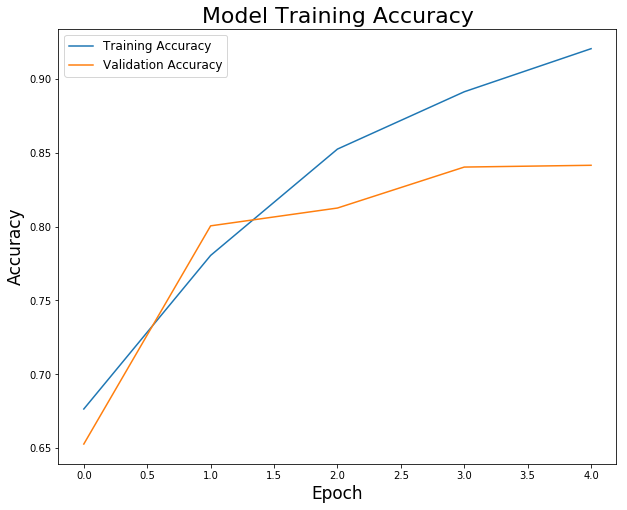

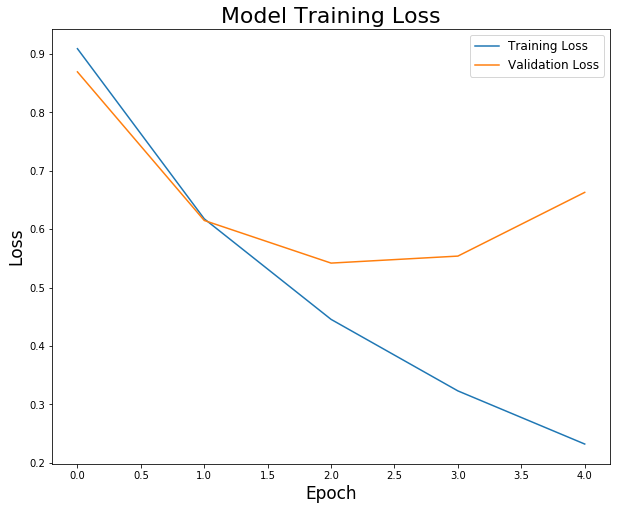

In [83]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

## Second Model Full Data 

In [84]:
model2.fit(X, y_cat, validation_data=(Xt, yt_cats), epochs=5)

Train on 6633 samples, validate on 1283 samples
Epoch 1/5
6633/6633 [==============================] - 198s 30ms/step - loss: 0.2678 - acc: 0.9215 - val_loss: 0.4861 - val_acc: 0.8589
Epoch 2/5
6633/6633 [==============================] - 173s 26ms/step - loss: 0.1672 - acc: 0.9504 - val_loss: 0.5359 - val_acc: 0.8652
Epoch 3/5
6633/6633 [==============================] - 173s 26ms/step - loss: 0.0996 - acc: 0.9661 - val_loss: 0.6115 - val_acc: 0.8659
Epoch 4/5
6633/6633 [==============================] - 172s 26ms/step - loss: 0.0812 - acc: 0.9729 - val_loss: 0.6558 - val_acc: 0.8714
Epoch 5/5
6633/6633 [==============================] - 170s 26ms/step - loss: 0.0595 - acc: 0.9806 - val_loss: 0.7226 - val_acc: 0.8776


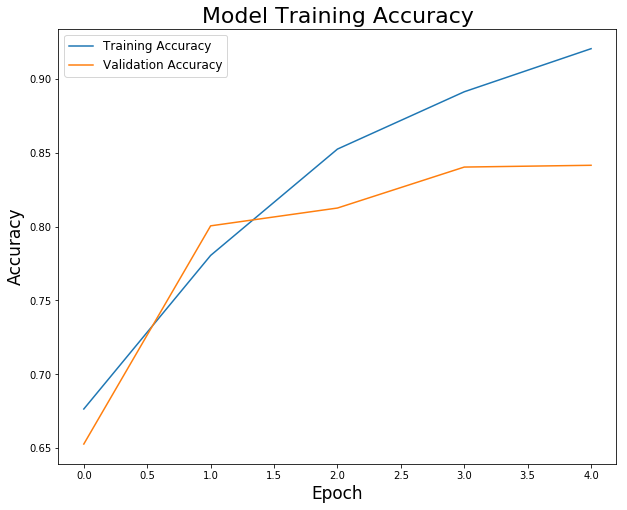

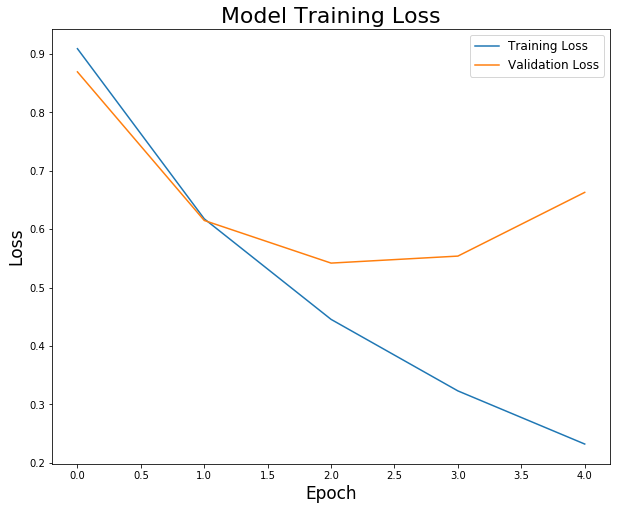

In [85]:
# Build charts for Loss and Accuracy over the Epochs 
# Model Fitting Accuracy
plt.figure(figsize=(10,8))
plt.plot(model_2.history['acc'])
plt.plot(model_2.history['val_acc'])
plt.title('Model Training Accuracy', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Accuracy', fontsize=17)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.show()

# Model Fitting Loss
plt.figure(figsize=(10,8))
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('Model Training Loss', fontsize=22)
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.show()

In [96]:
#Build predictions
model_2_preds = model2.predict_classes(Xt, 32, verbose=1)

1283/1283 [==============================] - 13s 10ms/step


In [100]:
pd.DataFrame(confusion_matrix(yt_en, model_2_preds),
             columns=targets, index=["Photo Books (-4042)", "Auto Fuses (-5588)",
                                    "Headboards (-5754)", "Hinges (-2844)", 
                                    "Lotion (-3988)"]).apply(lambda x: x/x.sum(),axis=1)

,1000014042,1000005888,1000015754,1000002844,1000003988
Photo Books (-4042),0.823129,0.020408,0.102041,0.047619,0.006803
Auto Fuses (-5588),0.100000,0.533333,0.116667,0.183333,0.066667
Headboards (-5754),0.042654,0.014218,0.857820,0.061611,0.023697
Hinges (-2844),0.008357,0.018106,0.030641,0.926184,0.016713
Lotion (-3988),0.013605,0.006803,0.027211,0.088435,0.863946


The second model did slightly better at classifying the test data, with an accuracy score of 87.77%. 

Again, the model did the best job at identifying hinges, and struggled with the auto fuses. 

What is suprising is that the overall accuracy went up, however the Auto Fuses accuracy went down as did the the accuracy of the lotion, which introcuded some false positives with photobooks and the lotion.


## Conclusion

-------

Overall this project was a good introduction to working with large data sets, classifying images, and learning about how different topologies impact model accuracy. As next steps, it would be instructive to run the models over more epochs, and experiement with different Image Generator functions to complete transformations on the images. 

Over the two sets of data and the two seperate models, all of them were significant improvements over the baseline, and produced accuracy scores in the range from to 84.87% to 87.77%

The biggest challenge with this project was the data itself, as the slow processing times and size of the image files made it harder to be nimble. Going forward I would look to build some smaller datasets to do this research phase and then work on implementing those topologies onto larger datasets, with an end goal of analyzing the full 7 million image catelog using the fit_generator functions in the keras library, and GPU computers speed up classification.  
